In [2]:
# libraries

import pandas as pd
import numpy as np
import tensorflow as tf
import keras 
from tensorflow.keras import models,layers
from keras.layers import Conv2D, MaxPool2D, Dense, Dropout, Flatten
from keras.models import Sequential
from tensorflow.keras import optimizers

def data_load_labels(data, labels):
    data_df = pd.read_csv(data, header=None)
    X = data_df.values.reshape((-1, 28, 28, 4)).clip(0, 255).astype(np.uint8)
    labels_df = pd.read_csv(labels, header=None)
    y = labels_df.values.getfield(dtype=np.int8)
    return X, y

X_train, y_train = data_load_labels(data='C:/Users/19405/Desktop/Capstone 2/X_train_sat6.csv',
                                    labels='C:/Users/19405/Desktop/Capstone 2/y_train_sat6.csv')

X_test, y_test = data_load_labels(data='C:/Users/19405/Desktop/Capstone 2/X_test_sat6.csv',
                                    labels='C:/Users/19405/Desktop/Capstone 2/y_test_sat6.csv')

print("Training data shape ", X_train.shape, y_train.shape)
print("Testing data shape ", X_test.shape, y_test.shape)

# Base model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28,28, 4))) #  RGB+IR images.
# model.add(layers.Conv2D(32, (3, 3),activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())  #collapse to 1D
model.add(layers.Dropout(0.5)) #added to reduce overfitting
model.add(layers.Dense(512,activation='relu')) #reduce after flatten
model.add(layers.Dense(6,activation='softmax')) #final 6-way classification, predict class
# model summary
print(model.summary())
# early stopping
from keras.callbacks import EarlyStopping
early_stop_mon=EarlyStopping(patience=3)
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.fit(X_train, y_train, batch_size=546, epochs=30, verbose=1, validation_data=(X_test, y_test), callbacks=[early_stop_mon])

Training data shape  (324000, 28, 28, 4) (324000, 6)
Testing data shape  (81000, 28, 28, 4) (81000, 6)
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 32)        1184      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 1600)              0         
_________________

In [4]:
model.save_weights('deepsat6-30epochs-weights.h5')

In [11]:
hist_df=pd.DataFrame.from_dict(model.history.history)
hist_df.to_csv('Desktop/Capstone 2/history.csv')

In [16]:
model.history.history

{'loss': [0.8607464119956173,
  0.10335273251392775,
  0.09024251701296479,
  0.07696681375411787,
  0.07162643629878207,
  0.0704282774693436,
  0.07236347929588346,
  0.06297862863547549,
  0.06428234066514091,
  0.05474037374031764,
  0.054892236900757306,
  0.050911251731251404,
  0.045582316302832354,
  0.04245960060167299,
  0.05076665374115799,
  0.04292066436647265,
  0.040378807466097726,
  0.03943558052135632,
  0.03782567117549479,
  0.03826718295098248,
  0.035717594977744196],
 'accuracy': [0.9162161,
  0.96185803,
  0.96649075,
  0.9719599,
  0.97437966,
  0.9740432,
  0.9726574,
  0.97669137,
  0.97641975,
  0.9799105,
  0.98003083,
  0.98171914,
  0.9839043,
  0.9850679,
  0.9821451,
  0.98463887,
  0.9857037,
  0.9859691,
  0.9866389,
  0.9863457,
  0.9875185],
 'val_loss': [0.11308702750448828,
  0.10330215787887573,
  0.06536737252799449,
  0.08515687669924012,
  0.0594646701456772,
  0.13033237351035631,
  0.05753338529969807,
  0.054353250907803026,
  0.05413312947

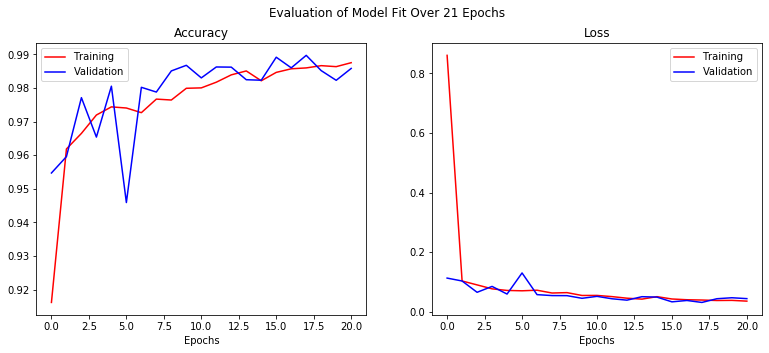

In [20]:
# Plot model fitting
import matplotlib.pyplot as plt
# adapted from Deep Learning With Python (Chollet)
h=model.history.history
epochs = range(len(h['accuracy']))
fig,ax=plt.subplots(1,2,figsize=(13,5))
ax[0].plot(epochs, h['accuracy'], 'r', label='Training')
ax[0].plot(epochs, h['val_accuracy'], 'b', label='Validation')
ax[0].set_title('Accuracy')
ax[0].set_xlabel('Epochs')
ax[0].legend()
ax[1].plot(epochs, h['loss'], 'r', label='Training')
ax[1].plot(epochs, h['val_loss'], 'b', label='Validation')
ax[1].set_title('Loss')
ax[1].set_xlabel('Epochs')
ax[1].legend()
plt.suptitle('Evaluation of Model Fit Over {} Epochs'.format(len(h['accuracy'])));